## How vocational students who have studied ICT are placed after one and three years from graduation

In [47]:
import pandas as pd
import numpy as np
import os
from sklearn import preprocessing
from sklearn import linear_model
import matplotlib.pyplot as plt 

### Load Raw Data

This data was taken from Tilastokeskus in .csv - format:
https://pxdata.stat.fi:443/PxWeb/sq/69e3b920-5e97-4e39-9fdc-61bbfbcfdfa9 

To install sklearn and pandas, open miniconda CMD and run:
```cmd
    pip install pandas
    pip install sklearn
    pip install matplotlib
```


NOTE: The data has a title-row, which has to be skipped (skiprows), also the encoding needs to be 'ISO-8850-1' (default UTF-8 doesn't work) and delimiter needs to be given also.

To see how the data is read into the variable, it helps to install Data Wrangler - extension. It can be used to view the data in a table format.

In [48]:
# load data
if os.path.exists('./csv/tivi_2020_2023.csv'):
   df =  pd.read_csv('./csv/tivi_2020_2023.csv', encoding='ISO-8859-1', delimiter=';', engine='python', skiprows=2)

The data has information about all the vocational ICT students who graduatated one year before the statistical year (2020, 2021, 2022, 2023), how the students have been placed after one year of graduation: employed, employed fulltime, employed students, students fulltime, unemployed, others. The same information is found also for three years after graduation. 
Data is gathered by regions (Ahvenanmaa, Varsinaissuomi, Satakunta, Kanta-Häme, Pirkanmaa, Päijät-Häme, Kymenlaakso, Etelä-Karjala, Etelä-Savo, Pohjois-Karjala, Pohjois-Savo, Keskisuomi, Etelä-Pohjanmaa, Pohjanmaa,Keski-Pohjanmaa, Pohjois-Pohjanmaa, Kainuu, Lappi). Data is categorized also by gender. Each value is presented as count as well as percentage.

It seems that there are no rows missing data.

In [49]:
df.head()

,Vuosi,Koulutusaste,Sukupuoli,Asuinmaakunta,Koulutusala,Tutkinnon suorittaneet vuosi ennen tilastovuotta yhteensä (lkm),Työlliset yhteensä vuosi valmistumisen jälkeen (lkm),Työlliset yhteensä vuosi valmistumisen jälkeen (%),Päätoimiset työlliset vuosi valmistumisen jälkeen (lkm),Päätoimiset työlliset vuosi valmistumisen jälkeen (%),...,Päätoimiset työlliset kolme vuotta valmistumisen jälkeen (lkm),Päätoimiset työlliset kolme vuotta valmistumisen jälkeen (%),Työlliset opiskelijat kolme vuotta valmistumisen jälkeen (lkm),Työlliset opiskelijat kolme vuotta valmistumisen jälkeen (%),Päätoimiset opiskelijat kolme vuotta valmistumisen jälkeen (lkm),Päätoimiset opiskelijat kolme vuotta valmistumisen jälkeen (%),Työttömät kolme vuotta valmistumisen jälkeen (lkm),Työttömät kolme vuotta valmistumisen jälkeen (%),Muut kolme vuotta valmistumisen jälkeen (lkm),Muut kolme vuotta valmistumisen jälkeen (%)
0,2020,32 Ammatillinen peruskoulutus,Sukupuolet yhteensä,Koko maa,Tietojenkäsittely ja tietoliikenne (ICT),2000,711,36,600,30,...,813,37,272,12,499,23,435,20,175,8
1,2020,32 Ammatillinen peruskoulutus,Sukupuolet yhteensä,Uusimaa,Tietojenkäsittely ja tietoliikenne (ICT),627,284,45,238,38,...,298,42,96,14,138,19,126,18,52,7
2,2020,32 Ammatillinen peruskoulutus,Sukupuolet yhteensä,Varsinais-Suomi,Tietojenkäsittely ja tietoliikenne (ICT),175,55,31,47,27,...,83,41,24,12,38,19,36,18,21,10
3,2020,32 Ammatillinen peruskoulutus,Sukupuolet yhteensä,Satakunta,Tietojenkäsittely ja tietoliikenne (ICT),49,16,33,12,24,...,22,39,5,9,16,28,11,19,3,5
4,2020,32 Ammatillinen peruskoulutus,Sukupuolet yhteensä,Kanta-Häme,Tietojenkäsittely ja tietoliikenne (ICT),87,27,31,23,26,...,21,33,4,6,15,23,14,22,10,16


We will consentrate only on these columns (in %): Vuosi, Asuinmaakunta, Päätoimiset työlliset vuosi valmistumisen jälkeen (%), Työlliset opiskelijat vuosi valmistumisen jälkeen (%), Päätoimiset opiskelijat vuosi valmistumisen jälkeen (%), Työttömät vuosi valmistumisen jälkeen (%) ja Muut vuosi valmistumisen jälkeen (%)

In [50]:
df_selected = df[['Vuosi', 'Sukupuoli', 'Asuinmaakunta', 'Päätoimiset työlliset vuosi valmistumisen jälkeen (%)', 'Työlliset opiskelijat vuosi valmistumisen jälkeen (%)', 'Päätoimiset opiskelijat vuosi valmistumisen jälkeen (%)', 'Työttömät vuosi valmistumisen jälkeen (%)', 'Muut vuosi valmistumisen jälkeen (%)']].copy()
df_selected.dropna() # drops rows with null values
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Vuosi                                                    252 non-null    int64 
 1   Sukupuoli                                                252 non-null    object
 2   Asuinmaakunta                                            252 non-null    object
 3   Päätoimiset työlliset vuosi valmistumisen jälkeen (%)    252 non-null    object
 4   Työlliset opiskelijat vuosi valmistumisen jälkeen (%)    252 non-null    object
 5   Päätoimiset opiskelijat vuosi valmistumisen jälkeen (%)  252 non-null    object
 6   Työttömät vuosi valmistumisen jälkeen (%)                252 non-null    object
 7   Muut vuosi valmistumisen jälkeen (%)                     252 non-null    object
dtypes: int64(1), object(7)
memory usage: 15.9

The data, which has tekstual values e.g. labels needs to be converted into numbers so that machine learning algorithm can use them.

[Label encoding](https://vitalflux.com/labelencoder-example-single-multiple-columns/#:~:text=Label%20encoding%20technique%20is%20implemented%20using%20sklearn%20LabelEncoder.,single%20and%20multiple%20columns%20in%20Python%20Pandas%20Dataframe.)

The regions (asuinmaakunta) labels should be converted into numbers.

In [51]:
df_selected.head()

,Vuosi,Sukupuoli,Asuinmaakunta,Päätoimiset työlliset vuosi valmistumisen jälkeen (%),Työlliset opiskelijat vuosi valmistumisen jälkeen (%),Päätoimiset opiskelijat vuosi valmistumisen jälkeen (%),Työttömät vuosi valmistumisen jälkeen (%),Muut vuosi valmistumisen jälkeen (%)
0,2020,Sukupuolet yhteensä,Koko maa,30,6,18,33,14
1,2020,Sukupuolet yhteensä,Uusimaa,38,7,12,28,14
2,2020,Sukupuolet yhteensä,Varsinais-Suomi,27,5,21,31,17
3,2020,Sukupuolet yhteensä,Satakunta,24,8,10,35,22
4,2020,Sukupuolet yhteensä,Kanta-Häme,26,5,18,34,16


In [52]:
le=preprocessing.LabelEncoder()
arr=le.fit_transform(df_selected['Asuinmaakunta'])
#df_selected['Asuinmaakunta']=arr             #this is not needed in this analysis
print(arr)
df_selected.head()

[ 8 19 20 17  5 11 16  9  1  3 15 13  7  2 12  6 14  4 10  0 18  8 19 20
 17  5 11 16  9  1  3 15 13  7  2 12  6 14  4 10  0 18  8 19 20 17  5 11
 16  9  1  3 15 13  7  2 12  6 14  4 10  0 18  8 19 20 17  5 11 16  9  1
  3 15 13  7  2 12  6 14  4 10  0 18  8 19 20 17  5 11 16  9  1  3 15 13
  7  2 12  6 14  4 10  0 18  8 19 20 17  5 11 16  9  1  3 15 13  7  2 12
  6 14  4 10  0 18  8 19 20 17  5 11 16  9  1  3 15 13  7  2 12  6 14  4
 10  0 18  8 19 20 17  5 11 16  9  1  3 15 13  7  2 12  6 14  4 10  0 18
  8 19 20 17  5 11 16  9  1  3 15 13  7  2 12  6 14  4 10  0 18  8 19 20
 17  5 11 16  9  1  3 15 13  7  2 12  6 14  4 10  0 18  8 19 20 17  5 11
 16  9  1  3 15 13  7  2 12  6 14  4 10  0 18  8 19 20 17  5 11 16  9  1
  3 15 13  7  2 12  6 14  4 10  0 18]


,Vuosi,Sukupuoli,Asuinmaakunta,Päätoimiset työlliset vuosi valmistumisen jälkeen (%),Työlliset opiskelijat vuosi valmistumisen jälkeen (%),Päätoimiset opiskelijat vuosi valmistumisen jälkeen (%),Työttömät vuosi valmistumisen jälkeen (%),Muut vuosi valmistumisen jälkeen (%)
0,2020,Sukupuolet yhteensä,Koko maa,30,6,18,33,14
1,2020,Sukupuolet yhteensä,Uusimaa,38,7,12,28,14
2,2020,Sukupuolet yhteensä,Varsinais-Suomi,27,5,21,31,17
3,2020,Sukupuolet yhteensä,Satakunta,24,8,10,35,22
4,2020,Sukupuolet yhteensä,Kanta-Häme,26,5,18,34,16


### Linear regression

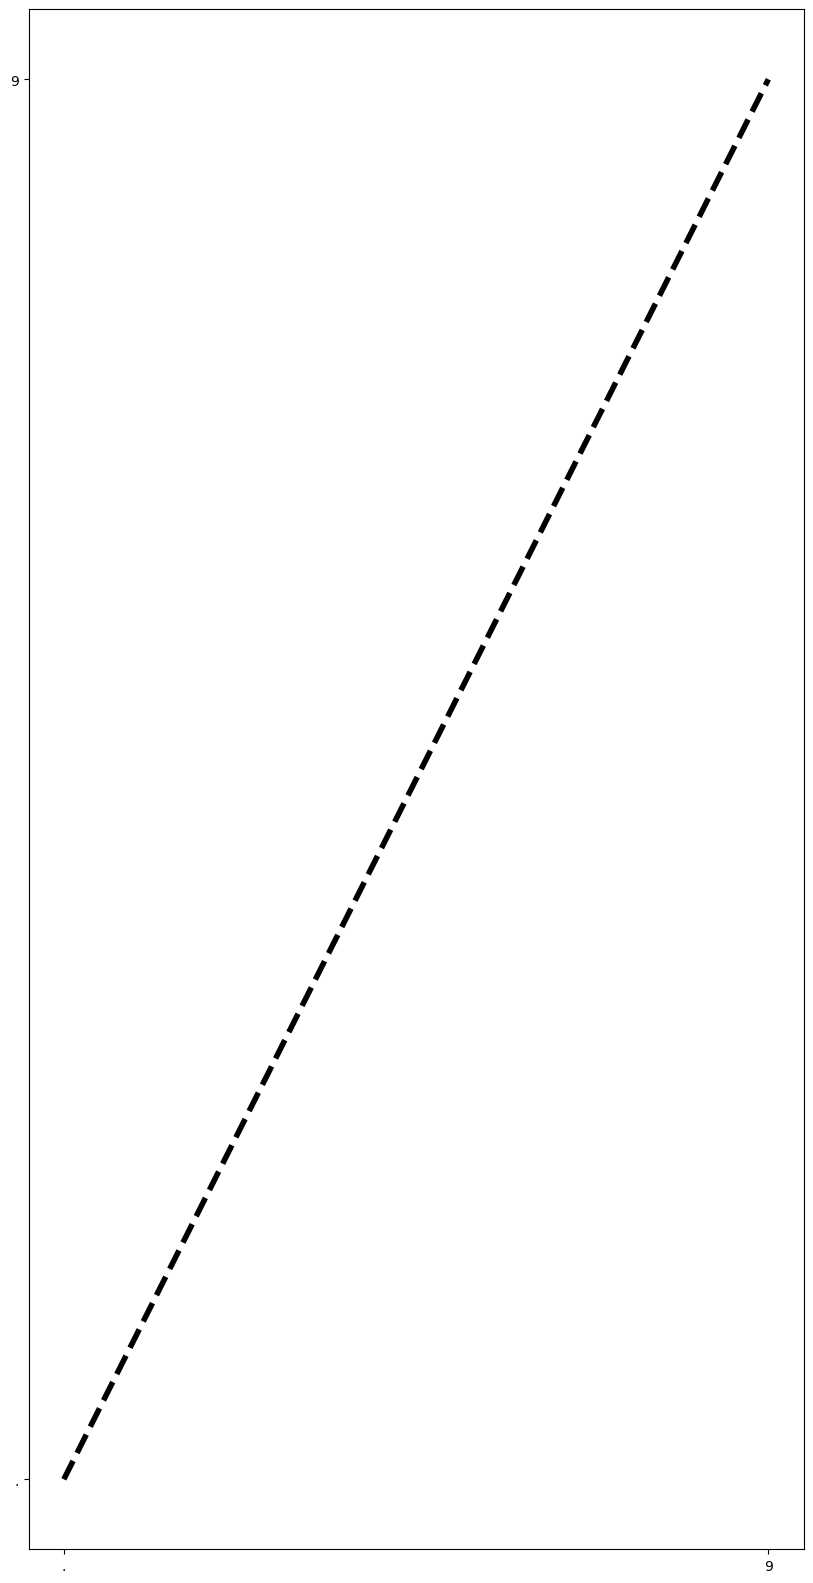

In [53]:
lr = linear_model.LinearRegression()
y=df_selected['Työttömät vuosi valmistumisen jälkeen (%)']
X=df_selected.drop(columns='Työttömät vuosi valmistumisen jälkeen (%)')
fig, ax = plt.subplots(figsize=(10,20))
ax.plot([y.min(), y.max()],[y.min(),y.max()], 'k--', lw=4)


### Printing data linked to one region

First we need to filter data to get only one region and all genders. The datatypes need to be changed for numbers and string to get a clear plot. Finally we set the title for the image.

/tmp/ipykernel_3970/1438545897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Työttömät vuosi valmistumisen jälkeen (%)']=df_filtered['Työttömät vuosi valmistumisen jälkeen (%)'].astype('int')
/tmp/ipykernel_3970/1438545897.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Vuosi']=df_filtered['Vuosi'].astype('string')


Text(0.5, 1.0, 'ICT alan ammatillisten valmistuneiden työttömyyden kehitys 2020-2023, Pirkanmaa')

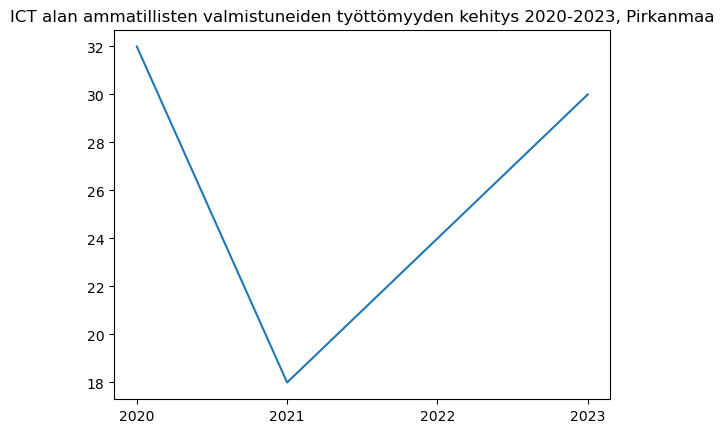

In [ ]:
df_filtered =  df_selected[(df_selected["Asuinmaakunta"]=='Pirkanmaa') & (df_selected["Sukupuoli"]=='Sukupuolet yhteensä')]
df_filtered['Työttömät vuosi valmistumisen jälkeen (%)']=df_filtered['Työttömät vuosi valmistumisen jälkeen (%)'].astype('int')
df_filtered['Vuosi']=df_filtered['Vuosi'].astype('string')
plt.plot(df_filtered['Vuosi'], df_filtered['Työttömät vuosi valmistumisen jälkeen (%)'])
plt.title('ICT alan ammatillisten valmistuneiden työttömyyden kehitys 2020-2023, Pirkanmaa')

### Plotting data from 3 regions

We plot data from multiple regions in one image.


Text(0.5, 1.0, 'ICT alan ammatillisten valmistuneiden työttömyyden kehitys 2020-2023')

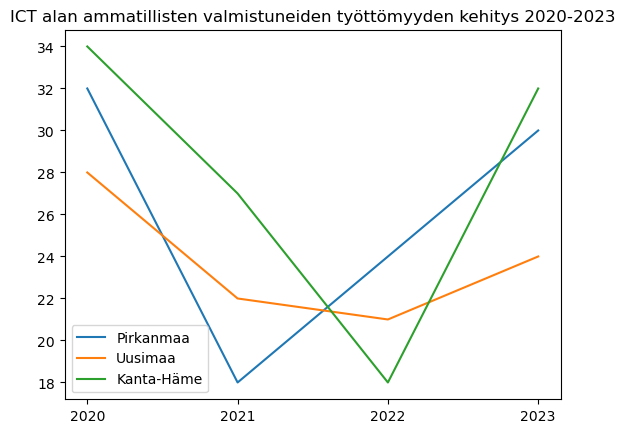

In [72]:
column_names = ['Pirkanmaa', 'Uusimaa', 'Kanta-Häme']
col_types=dict.fromkeys(column_names, np.int32)
df_filtered_allgenders = df_selected[(df_selected["Sukupuoli"]=='Sukupuolet yhteensä')]
df_filtered_allgenders = df_filtered_allgenders.replace('.', np.nan) #since there are dots in the data
df_filtered_allgenders['Työttömät vuosi valmistumisen jälkeen (%)']=df_filtered_allgenders['Työttömät vuosi valmistumisen jälkeen (%)'].astype('float')
df_filtered_allgenders['Vuosi']=df_filtered_allgenders['Vuosi'].astype('string')
df_filtered_allagenders_grouped = df_filtered_allgenders.groupby(by='Asuinmaakunta')
#print(df_filtered_allagenders_grouped.get_group('Pirkanmaa'))
plt.plot(df_filtered['Vuosi'], df_filtered_allagenders_grouped.get_group('Pirkanmaa')['Työttömät vuosi valmistumisen jälkeen (%)'], label="Pirkanmaa")
plt.plot(df_filtered['Vuosi'], df_filtered_allagenders_grouped.get_group('Uusimaa')['Työttömät vuosi valmistumisen jälkeen (%)'], label="Uusimaa")
plt.plot(df_filtered['Vuosi'], df_filtered_allagenders_grouped.get_group('Kanta-Häme')['Työttömät vuosi valmistumisen jälkeen (%)'], label='Kanta-Häme')
plt.legend()
plt.title('ICT alan ammatillisten valmistuneiden työttömyyden kehitys 2020-2023')

### Plotting all regision in one image

For this we need a loop